In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import os
import sys
import random
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
sys.path.append("..")

from src.datasets.contrastive_pairs_dataset import ContrastivePairsModule
from src.config import SEED

In [51]:
contrastive_pairs_module = ContrastivePairsModule(
    batch_size=1,
    n_workers=1,
    seed=SEED
)
contrastive_pairs_module.setup(stage="fit")
contrastive_pairs_module.setup(stage="test")
train_dataloader = contrastive_pairs_module.train_dataloader()
val_dataloader = contrastive_pairs_module.val_dataloader()
test_dataloader = contrastive_pairs_module.test_dataloader()

🌱 Setting the seed to 0 for generating dataloaders.
✅ Created weighted dataset with 17173 total images.
🟢 Class distribution:
🟢 	- clear: 5062 images.
🟢 	- partial: 5096 images.
🟢 	- overcast: 7015 images.
🟢 Balanced epoch size: 6000 samples.
✅ Found 20 masks for 20 camera IDs.
✅ Found 20 masks for 20 camera IDs.
✅ Found bounding boxes for 20 camera IDs.
✅ Created weighted dataset with 2119 total images.
🟢 Class distribution:
🟢 	- clear: 625 images.
🟢 	- partial: 627 images.
🟢 	- overcast: 867 images.
🟢 Balanced epoch size: 600 samples.
✅ Found 20 masks for 20 camera IDs.
✅ Found 20 masks for 20 camera IDs.
✅ Found bounding boxes for 20 camera IDs.
🌱 Setting the seed to 0 for generating dataloaders.
✅ Created weighted dataset with 2198 total images.
🟢 Class distribution:
🟢 	- clear: 648 images.
🟢 	- partial: 655 images.
🟢 	- overcast: 895 images.
🟢 Balanced epoch size: 600 samples.
✅ Found 20 masks for 20 camera IDs.
✅ Found 20 masks for 20 camera IDs.
✅ Found bounding boxes for 20 cam

In [52]:
it = iter(test_dataloader)

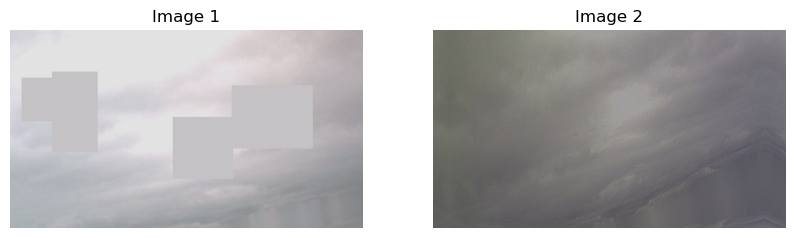

In [70]:
def unnormalize(
        image,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    ):
    image = image.copy()
    image = image * std + mean
    image = image.clip(0, 1)
    return image

batch = next(it)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image 1")
plt.imshow(unnormalize(batch[0][0][0].numpy().transpose(1, 2, 0)))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Image 2")
plt.imshow(unnormalize(batch[0][0][1].numpy().transpose(1, 2, 0)))
plt.axis("off")
plt.show()